In [1]:
import numpy as np
import pandas as pd
import wfdb
import os

################################################################################################

##     ## ########    ###    ########  ######## ########  ##     ## ########  ########  ##    ## 
##     ## ##         ## ##   ##     ##    ##    ##     ## ##     ## ##     ## ##     ##  ##  ##  
##     ## ##        ##   ##  ##     ##    ##    ##     ## ##     ## ##     ## ##     ##   ####   
######### ######   ##     ## ########     ##    ########  ##     ## ##     ## ##     ##    ##    
##     ## ##       ######### ##   ##      ##    ##     ## ##     ## ##     ## ##     ##    ##    
##     ## ##       ##     ## ##    ##     ##    ##     ## ##     ## ##     ## ##     ##    ##    
##     ## ######## ##     ## ##     ##    ##    ########   #######  ########  ########     ##    

################################################################################################

RELPATH = "BIG_DATASET/" # Relative pathname to Physionet dataset

#==============
# LOAD RAW DATA
#==============

f = open(RELPATH + "RECORDS") # Open the file containing directory paths

lines = f.readlines() # Read file line by line

paths = [] # New list to hold our pathnames

for l in lines:
    paths.append(l.strip()) # Remove newline character and append to paths list

hea_files = [] # New list to hold all filenames with .hea extension

for path in paths: # Iterate through our paths
    for file in os.listdir("{}{}".format(RELPATH, path)): # List files in each path
        if file.endswith(".hea"): # Check if file has a .hea extension
            hea_files.append(RELPATH + path + file.strip(".hea")) # If so, append to hea_files list
            

      
def load_data(x, n):
    raw_data = []
    print("Loading signals {}-{}".format(x, x+n))
    for i in range(x, x+n):
        raw_data.append(wfdb.rdsamp(hea_files[i]))
    print("Done loading data.")
    return raw_data
    

#===============
# PREPROCESSING
#===============


diagnostics = []
ages = []
sex = []

# Separate raw_data into signals and meta_data

def separate_data(data):
    print("Parsing signals...")
    signals = np.empty((0,5000,12))
    for d in data: 
        signals = np.append(signals, [d[0]], axis=0) 
    print("Done parsing signals.")
    return signals

def separate_y_data(data):
    print("Parsing labels...")
    metadata = []
    for d in data: 
        metadata.append(d[1])
    print("Done parsing labels.")
    return metadata

# Parsing functions

def get_dx(dx):
    temp = dx[4:] # Remove Dx: from line
    temp = temp.split(",") # Split CSVs into list
    for i in range(0, len(temp)): # Convert to integers
        temp[i] = int(temp[i]) 
    return temp

def parse_age(a):
    temp = a[5:] # Remove Age: from line
    return int(temp) # Return age as integer

def parse_sex(s):
    temp = s[5:] # Remove Sex: from line
    sx = 1 if temp == 'Male' else 0 # Male = 1 Female = 0
    return sx

# Separate metadata into different categories

def get_diagnostics(metadata):
    diagnostics = []
    for m in metadata:
        dx = m.get('comments')[2] # Get Dx column in comments
        diagnostics.append(get_dx(dx))
    return diagnostics

def categories():
    for m in metadata:
        a = m.get('comments')[0] # Get age
        s = m.get('comments')[1] # Get sex
        dx = m.get('comments')[2] # Get Dx column in comments
        diagnostics.append(get_dx(dx))
        ages.append(parse_age(a))
        sex.append(parse_sex(s))

#============
# CONDITIONS
#============

conditions = pd.read_csv("{}ConditionNames_SNOMED-CT.csv".format(RELPATH)) # Load condition names/numbers
cond_acronyms = dict(zip(conditions['Snomed_CT'], conditions['Acronym Name'])) # Acronym dictionary
cond_names = dict(zip(conditions['Snomed_CT'], conditions['Full Name'])) # Name dictionary

def get_acronym(l):
    temp = []
    for item in l:
        temp.append(cond_acronyms.get(item)) # Get cond acronym from diagnostic number
    return temp

def get_name(l):
    temp = []
    for item in l:
        temp.append(cond_names.get(item)) # Get cond name from diagnostic number
    return temp

In [ ]:
# Data Acquisition... Should probably be in data visualization.

ages = []

def parse_by_age():
    for i in range(0, 90):
        x = load_data(i*500, 500) # Load 500 at a time
        metadata = separate_y_data(x)
        for md in metadata:
            age = md.get('comments')[0]
            age = parse_age(age)
            ages.append(age)
sexes = []
def parse_by_sex():
    for i in range(0, 90):
        x = load_data(i*500, 500) # Load 500 at a time
        metadata = separate_y_data(x)
        for md in metadata:
            sex = md.get('comments')[1]
            sex = parse_sex(sex)
            sexes.append(sex)

parse_by_sex()

In [40]:
# LOAD Y DATA INTO FILES

def make_y(diags):
    temp = []
    for n in nums:
        if n in diags:
            temp.append(1)
        else:
            temp.append(0)
    return temp

start = 0
stop = 90

for i in range(start, stop):
    rd = load_data(i*500, 500) # Load first 10,000
    metadata = separate_y_data(rd)
    diagnostics = []
    for m in metadata:
        dx = m.get('comments')[2] # Get Dx column in comments
        diagnostics.append(get_dx(dx))
    np.save(RELPATH + 'ACRONYMS/data-{}.npy'.format(i), np.asarray(diagnostics))
    print("Data file saved. ({}/{})".format(i+1, stop), flush=True)

Loading signals 0-500
Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (1/90)
Loading signals 500-1000


/tmp/ipykernel_7264/3923238827.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(RELPATH + 'ACRONYMS/data-{}.npy'.format(i), np.asarray(diagnostics))


Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (2/90)
Loading signals 1000-1500
Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (3/90)
Loading signals 1500-2000
Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (4/90)
Loading signals 2000-2500
Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (5/90)
Loading signals 2500-3000
Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (6/90)
Loading signals 3000-3500
Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (7/90)
Loading signals 3500-4000
Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (8/90)
Loading signals 4000-4500
Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (9/90)
Loading signals 4500-5000
Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (10/90)
Loading signals 5000-5500
Done loading data.
Parsing 

Loading signals 38000-38500
Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (77/90)
Loading signals 38500-39000
Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (78/90)
Loading signals 39000-39500
Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (79/90)
Loading signals 39500-40000
Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (80/90)
Loading signals 40000-40500
Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (81/90)
Loading signals 40500-41000
Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (82/90)
Loading signals 41000-41500
Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (83/90)
Loading signals 41500-42000
Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (84/90)
Loading signals 42000-42500
Done loading data.
Parsing labels...
Done parsing labels.
Data file saved. (85/90)
L

In [2]:
vals = np.load(RELPATH + "ACRONYMS/data-0.npy", allow_pickle=True)
for i in range(1, 90):
    temp = np.load(RELPATH + f"ACRONYMS/data-{i}.npy", allow_pickle=True)
    vals = np.concatenate((vals, temp), axis=0)
len(vals)

45000

In [3]:
vals = np.concatenate(vals, axis=0)

In [4]:
vals

array([164889003,  59118001, 164934002, ...,  81898007,  81898007,
        81898007], dtype=int64)

In [7]:
unique, counts = np.unique(vals, return_counts=True)
print(f'Unique values: {unique}')
print(f'Counts: {counts}')

Unique values: [       5609005        6374002       10370003       11157007
       13640000       17338001       17366009       27885002
       29320008       39732003       47665007       49578007
       50799005       54016002       54329005       55827005
       55930002       57054005       59118001       59931005
       61277005       61721007       63593006       65778007
       74390002       75532003       77867006       81898007
       89792004      106068003      111288001      111975006
      164865005      164873001      164889003      164890007
      164896001      164909002      164912004      164917005
      164930006      164931005      164934002      164937009
      164942001      164947007      195042002      195060002
      195101003      233892002      233897008      233917008
      251120003      251146004      251164006      251166008
      251170000      251173003      251180001      251187003
      251198002      251199005      251205003      251223006
      270

In [8]:
acronyms = get_acronym(unique)
names = get_name(unique)

In [9]:
occur = []
for n, a, c, u in zip(names, acronyms, counts, unique):
    occur.append([n, a, c, u])

In [10]:
occur.sort(key = lambda occur: occur[2])

In [11]:
occur.reverse()

In [16]:
i = 0
for n, a, c, u in occur:
    i += 1
    percent = (c/45000*100)
    #print('{}: [{}] {} ({}) - {} ({:.2f}%)'.format(i, u, n, a, c, percent))
    print(f'{i}: {u} ({n})')

1: 426177001 (Sinus Bradycardia)
2: 426783006 (Sinus Rhythm)
3: 164890007 (Atrial Flutter)
4: 427084000 (Sinus Tachycardia)
5: 164934002 (T wave Change)
6: 55827005 (left ventricle hypertrophy)
7: 55930002 (Electrocardiograpic ST segment changes)
8: 59931005 (T wave opposite)
9: 427393009 (Sinus Irregularity)
10: 164889003 (Atrial Fibrillation)
11: 429622005 (ST drop down)
12: 39732003 (Axis left shift)
13: 284470004 (Premature Atrial Complex)
14: 10370003 (Rhythm from artificial pacing)
15: 428750005 (ST-T Change)
16: 270492004 (1 degree atrioventricular block)
17: 713427006 (Complete right bundle branch block)
18: 427172004 (Premature ventricular contractions)
19: 164917005 (abnormal Q wave)
20: 251146004 (lower voltage QRS in all lead)
21: 47665007 (Axis right shift)
22: 164930006 (ST extension)
23: 698252002 (Intraventricular block)
24: 426761007 (Supraventricular Tachycardia)
25: 61721007 (Counterclockwise vectorcardiographic loop)
26: 59118001 (right bundle branch block)
27: 1648

array([164889003,  59118001, 164934002, ...,  81898007,  81898007,
        81898007], dtype=int64)

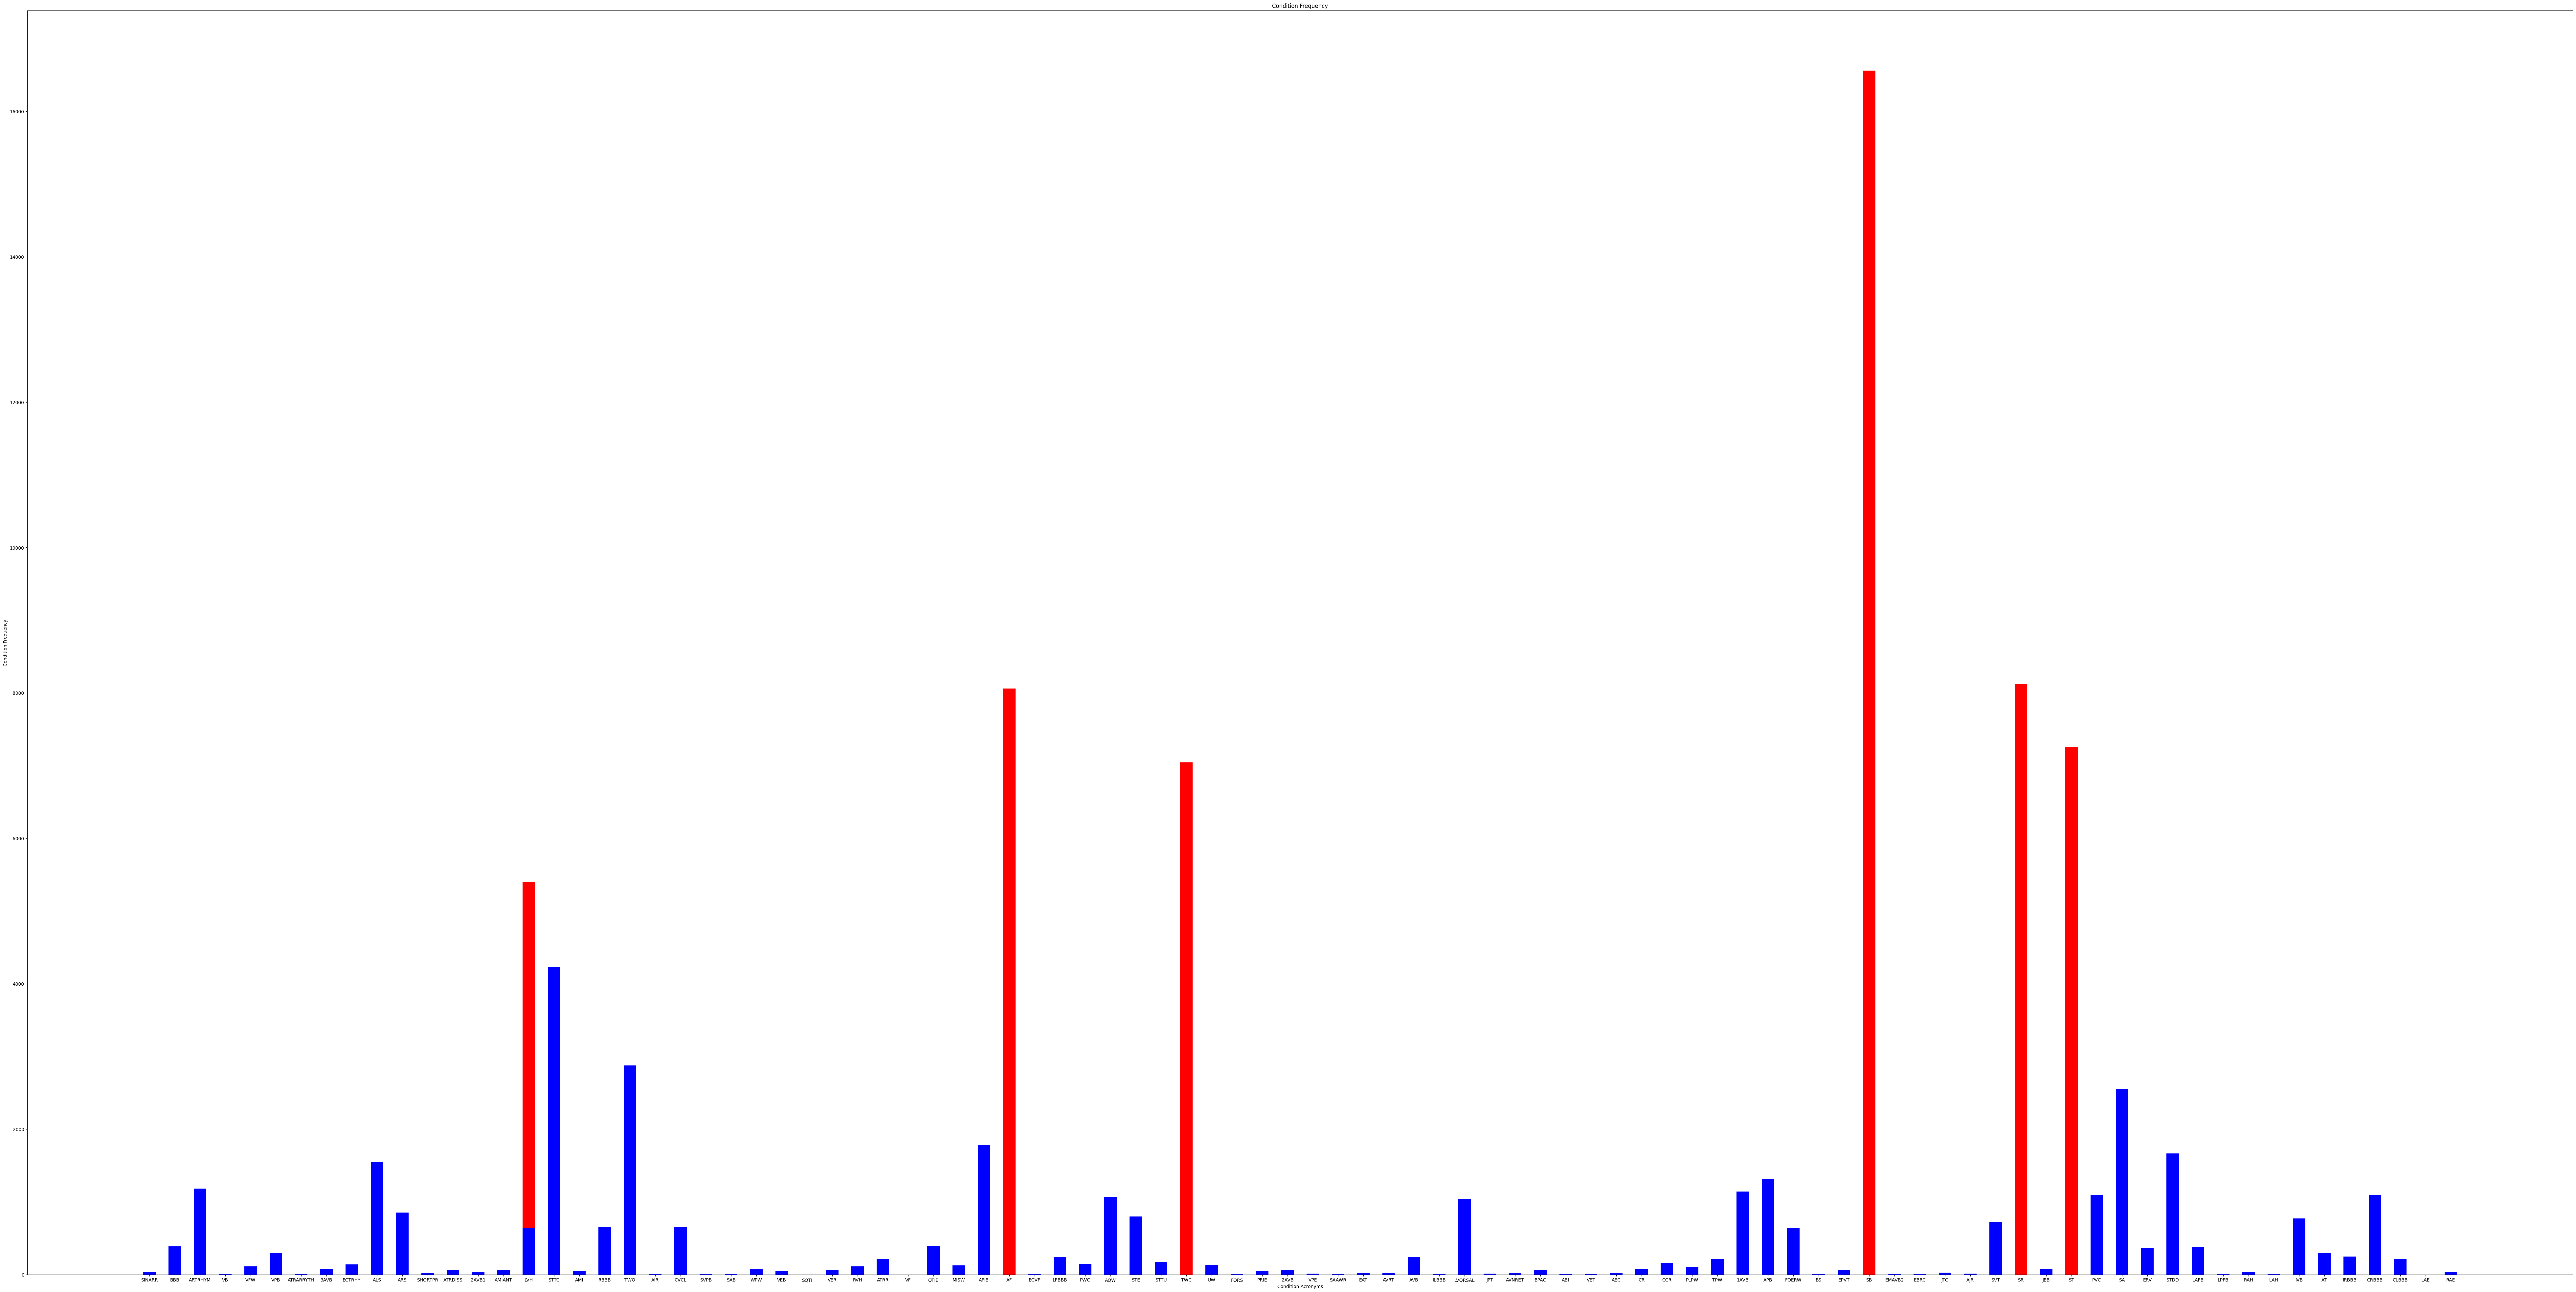

In [100]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (100, 50))
 
# creating the bar plot

plt.xlabel("Condition Acronyms")
plt.ylabel("Condition Frequency")
plt.title("Condition Frequency")
colors = ["red" if i > 5000 else "blue" for i in counts]
plt.bar(acronyms, counts, color =colors,
        width = 0.5)
 
plt.show()

In [127]:
popular = []
popular_ct = []
snomed = []

for i in range(0, len(counts)):
    if counts[i] > 5000:
        popular.append(names[i])
        popular_ct.append(counts[i])
        snomed.append(unique[i])


In [128]:
popular = ['Left Ventricle Hypertrophy',
 'Atrial Flutter',
 'T wave Change',
 'Sinus Bradycardia',
 'Sinus Rhythm',
 'Sinus Tachycardia',
 'Other']
popular_ct.append(35354)

([<matplotlib.patches.Wedge at 0x7fbd7ed23670>,
 [Text(1.079521447203724, 0.21126628937712116, 'Left Ventricle Hypertrophy'),
  Text(0.8588266213866727, 0.6873258575068693, 'Atrial Flutter'),
  Text(0.3828084332998486, 1.0312408561507422, 'T wave Change'),
  Text(-0.5168075070588256, 0.9710355300644987, 'Sinus Bradycardia'),
  Text(-1.0784107709448232, 0.2168644948122954, 'Sinus Rhythm'),
  Text(-1.03259726496748, -0.3791343935620719, 'Sinus Tachycardia'),
  Text(0.3311021984285221, -1.0489858598645645, 'Other')],
 [Text(0.5888298802929403, 0.11523615784206606, '6.15%'),
  Text(0.46845088439273047, 0.374905013185565, '9.18%'),
  Text(0.20880459998173556, 0.5624950124458593, '8.02%'),
  Text(-0.28189500385026844, 0.5296557436715447, '18.86%'),
  Text(-0.5882240568789944, 0.1182897244430702, '9.25%'),
  Text(-0.5632348718004435, -0.20680057830658466, '8.26%'),
  Text(0.1806011991428302, -0.5721741053806715, '40.27%')])

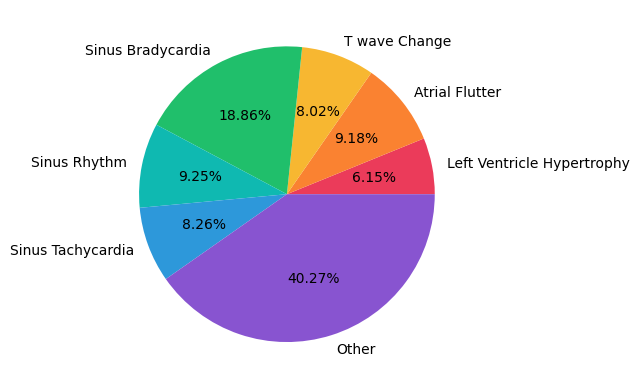

In [129]:
fig, ax = plt.subplots()

colors = ['#eb3b5a', '#fa8231', '#f7b731', '#20bf6b', '#0fb9b1', '#2d98da', '#8854d0']

ax.pie(popular_ct, labels=popular, autopct='%1.2f%%', colors=colors)

In [136]:
indexes = np.where(vals == snomed[0])

In [141]:
popular

['Left Ventricle Hypertrophy',
 'Atrial Flutter',
 'T wave Change',
 'Sinus Bradycardia',
 'Sinus Rhythm',
 'Sinus Tachycardia',
 'Other']

In [142]:
LVH = np.where(vals == snomed[0])
AF = np.where(vals == snomed[1])
TWC = np.where(vals == snomed[2])
SB = np.where(vals == snomed[3])
SR = np.where(vals == snomed[4])
ST = np.where(vals == snomed[5])ytest = np.load('BIG_DATASET/YTEST/data-70.npy', allow_pickle=True)

for i in range(71, 90):
    y = np.load(f'BIG_DATASET/YTEST/data-{i}.npy', allow_pickle=True)
    ytest = np.concatenate((ytest, y), axis=0)

In [166]:
ac1 = np.load(RELPATH + "ACRONYMS/data-0.npy", allow_pickle=True)
for i in range(1, 20):
    temp = np.load(RELPATH + f"ACRONYMS/data-{i}.npy", allow_pickle=True)
    ac1 = np.concatenate((ac1, temp), axis=0)

In [167]:
len(ac1)

10000

In [168]:
ac1 = np.concatenate(ac1, axis=0)

In [191]:
LVH2 = np.where(ac1 == snomed[2])

In [192]:
len(LVH2[0])

1862

In [18]:
ytest = np.load('BIG_DATASET/YDATA/data-0.npy', allow_pickle=True)

for i in range(0, 70):
    y = np.load(f'BIG_DATASET/YDATA/data-{i}.npy', allow_pickle=True)
    ytest = np.concatenate((ytest, y), axis=0)

In [19]:
unique, count = np.unique(ytest, return_counts=True)

In [20]:
unique, count

(array([0, 1]), array([27413,  8087]))